In [69]:
import pandas as pd

file_path = "/home/debojit/trajectory_data/te_data.csv"
df = pd.read_csv(file_path)



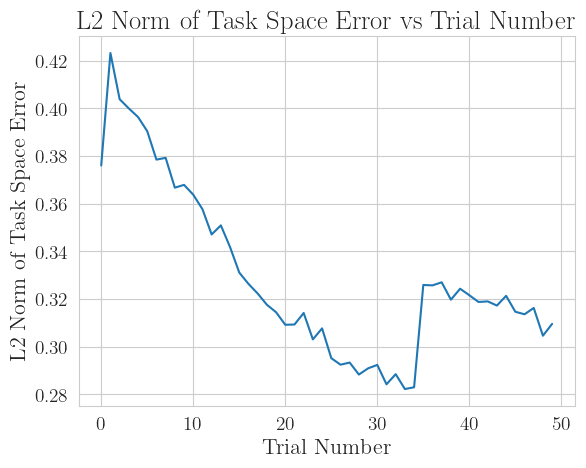

In [70]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Path to the CSV file
file_path = "/home/debojit/Output_Generalization/trajectory_data/te_data.csv"

# Read the CSV file into a DataFrame
df = pd.read_csv(file_path, skiprows=1, header=None, names=['TE_x', 'TE_y'])

# Convert string representations of lists to actual lists
df['TE_x'] = df['TE_x'].apply(lambda x: np.array(eval(x)))
df['TE_y'] = df['TE_y'].apply(lambda x: np.array(eval(x)))

# Calculate L2 norm of task space error for each trial
df['L2_norm'] = np.sqrt((df['TE_x'].apply(np.linalg.norm))**2 + (df['TE_y'].apply(np.linalg.norm))**2)

# Plot L2 norm of task space error against trial number
plt.plot(df.index, df['L2_norm'])
plt.xlabel('Trial Number')
plt.ylabel('L2 Norm of Task Space Error')
plt.title('L2 Norm of Task Space Error vs Trial Number')
plt.grid(True)
plt.show()


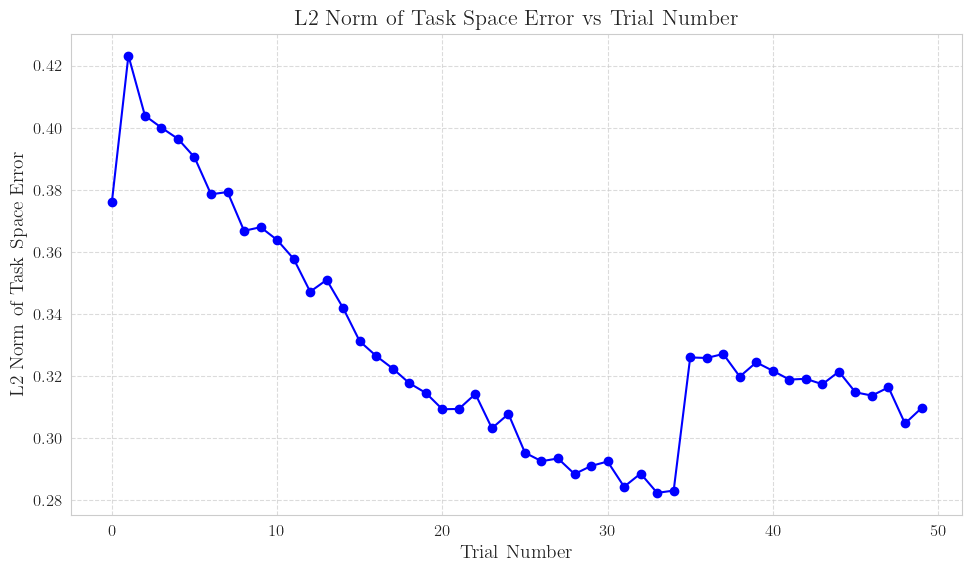

In [71]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Read the CSV file into a DataFrame
df = pd.read_csv(file_path, skiprows=1, header=None, names=['TE_x', 'TE_y'])

# Convert string representations of lists to actual lists
df['TE_x'] = df['TE_x'].apply(lambda x: np.array(eval(x)))
df['TE_y'] = df['TE_y'].apply(lambda x: np.array(eval(x)))

# Calculate L2 norm of task space error for each trial
df['L2_norm'] = np.sqrt((df['TE_x'].apply(np.linalg.norm))**2 + (df['TE_y'].apply(np.linalg.norm))**2)

# Plot L2 norm of task space error against trial number
plt.figure(figsize=(10, 6))
plt.plot(df.index, df['L2_norm'], marker='o', color='b', linestyle='-')
plt.xlabel('Trial Number', fontsize=14)
plt.ylabel('L2 Norm of Task Space Error', fontsize=14)
plt.title('L2 Norm of Task Space Error vs Trial Number', fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


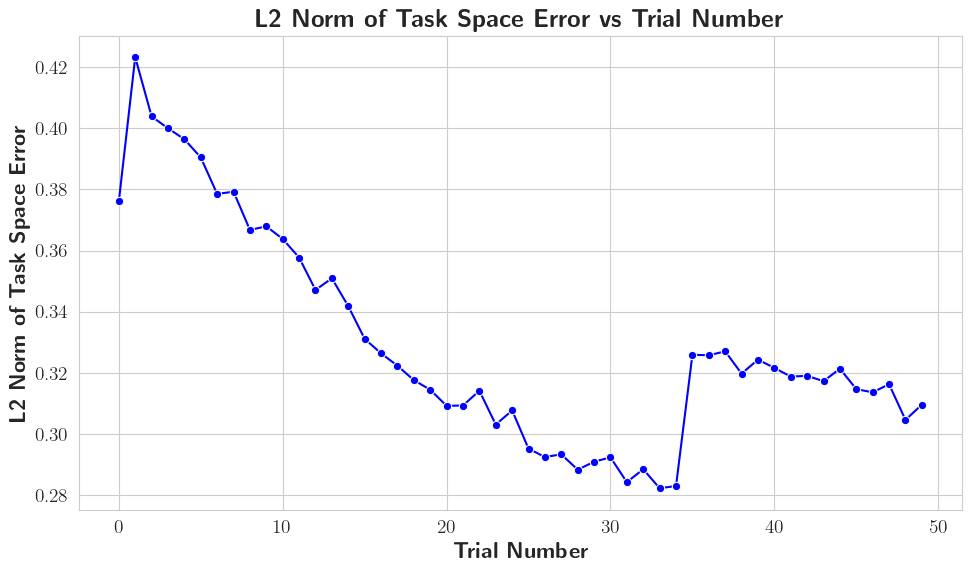

In [72]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Enable LaTeX font rendering in matplotlib with bold text globally
plt.rcParams.update({
    "text.usetex": True,               # Use LaTeX for text
    "font.family": "serif",            # Use serif fonts (matches LaTeX)
    "font.serif": ["Computer Modern"], # Set font to Computer Modern, the default LaTeX font
    "axes.labelsize": 16,              # Set font sizes for axis labels
    "font.size": 16,                   # Set default font size
    "legend.fontsize": 14,
    "xtick.labelsize": 14,
    "ytick.labelsize": 14,
    "font.weight": "bold",             # Bold all text
    "axes.labelweight": "bold"         # Bold axis labels
})

# Read the CSV file into a DataFrame
df = pd.read_csv(file_path, skiprows=1, header=None, names=['TE_x', 'TE_y'])

# Convert string representations of lists to actual lists
df['TE_x'] = df['TE_x'].apply(lambda x: np.array(eval(x)))
df['TE_y'] = df['TE_y'].apply(lambda x: np.array(eval(x)))

# Calculate L2 norm of task space error for each trial
df['L2_norm'] = np.sqrt((df['TE_x'].apply(np.linalg.norm))**2 + (df['TE_y'].apply(np.linalg.norm))**2)

# Set Seaborn style
sns.set_style("whitegrid")

# Plot L2 norm of task space error against trial number
plt.figure(figsize=(10, 6))
sns.lineplot(data=df, x=df.index, y='L2_norm', marker='o', color='b')

# Set x and y labels with LaTeX bold
plt.xlabel(r'\textbf{Trial Number}', fontsize=16)
plt.ylabel(r'\textbf{L2 Norm of Task Space Error}', fontsize=16)

# Add a title with LaTeX bold
plt.title(r'\textbf{L2 Norm of Task Space Error vs Trial Number}', fontsize=18)

# Set ticks font size
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

# Add a grid
plt.grid(True)

# Adjust layout and save the figure
plt.tight_layout()
plt.savefig("image3.png")
plt.show()


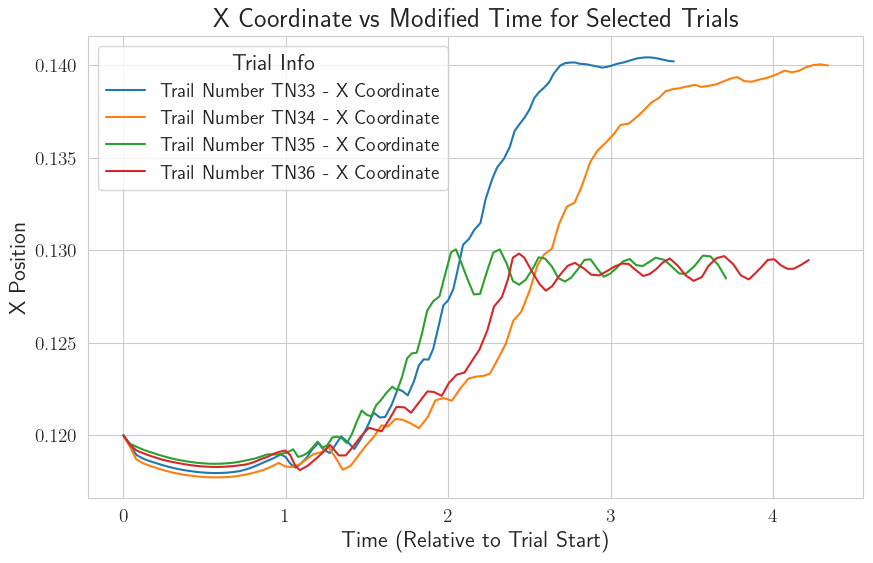

In [73]:
import pandas as pd
import matplotlib.pyplot as plt

file_path = "/home/debojit/Output_Generalization/trajectory_data/all_trials_data.csv"
# Read the CSV file into a DataFrame
df = pd.read_csv(file_path)

# Initialize a dictionary to store modified time values
modified_time = {}

# Iterate through each unique trial and calculate modified time values
for trial in df['Trial'].unique():
    # Get the data for the current trial and calculate the relative times
    trial_data = df[df['Trial'] == trial]
    min_time = trial_data['Time'].min()
    modified_time[trial] = trial_data['Time'] - min_time

# Add the modified time values as a new column to the DataFrame
df['Modified_Time'] = df.apply(lambda row: modified_time[row['Trial']][row.name], axis=1)

# Filter the DataFrame for specified trials
trials_data = df[df['Trial'].isin(['TN33', 'TN34', 'TN35', 'TN36'])]

# Plot 'X' coordinates against modified time for each specified trial
plt.figure(figsize=(10, 6))
for trial in trials_data['Trial'].unique():
    trial_data = trials_data[trials_data['Trial'] == trial]
    plt.plot(trial_data['Modified_Time'], trial_data['X'], label=f'Trail Number {trial} - X Coordinate')

plt.xlabel('Time (Relative to Trial Start)')
plt.ylabel('X Position')
plt.title('X Coordinate vs Modified Time for Selected Trials')
plt.legend(title="Trial Info")
plt.grid(True)
plt.savefig("X_Coordinates_vs_Time.png")
plt.show()


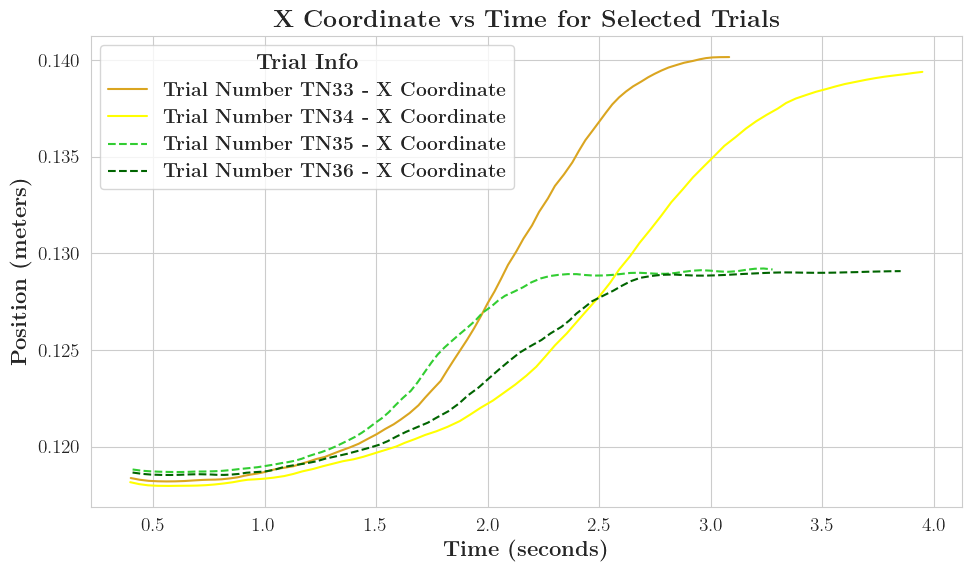

In [74]:
import pandas as pd
import matplotlib.pyplot as plt

# Enable LaTeX font rendering in matplotlib with bold text globally
plt.rcParams.update({
    "text.usetex": True,               # Use LaTeX for text
    "font.family": "serif",            # Use serif fonts (matches LaTeX)
    "font.serif": ["Computer Modern"], # Set font to Computer Modern, the default LaTeX font
    "axes.labelsize": 20,              # Set font sizes for axis labels
    "font.size": 16,                   # Set default font size
    "legend.fontsize": 14,
    "xtick.labelsize": 14,
    "ytick.labelsize": 14,
    "font.weight": "bold",             # Bold all text
    "axes.labelweight": "bold"         # Bold axis labels
})

# Read the CSV file into a DataFrame
file_path = "/home/debojit/Output_Generalization/trajectory_data/all_trials_data.csv"
df = pd.read_csv(file_path)

# Initialize a dictionary to store modified time values
modified_time = {}

# Iterate through each unique trial and calculate modified time values
for trial in df['Trial'].unique():
    # Get the data for the current trial and calculate the relative times
    trial_data = df[df['Trial'] == trial]
    min_time = trial_data['Time'].min()
    modified_time[trial] = trial_data['Time'] - min_time

# Add the modified time values as a new column to the DataFrame
df['Time'] = df.apply(lambda row: modified_time[row['Trial']][row.name], axis=1)

# Filter the DataFrame for specified trials
trials_data = df[df['Trial'].isin(['TN33', 'TN34', 'TN35', 'TN36'])]

# Plot 'X' coordinates against modified time for each specified trial, applying smoothing
plt.figure(figsize=(10, 6))
window_size = 20  # Adjust the window size as needed
line_styles = {
    'TN33': ('goldenrod', '-'),      # Lighter yellow
    'TN34': ('yellow', '-'),    # Standard yellow
    'TN35': ('limegreen', '--'),  # Deep green
    'TN36': ('darkgreen', '--') # Darker deep green
}

for trial in trials_data['Trial'].unique():
    trial_data = trials_data[trials_data['Trial'] == trial]
    # Apply a rolling window to smooth the data
    smooth_x = trial_data['X'].rolling(window=window_size, center=True).mean()
    color, style = line_styles[trial]
    plt.plot(trial_data['Time'], smooth_x, label=fr'\textbf{{Trial Number {trial} - X Coordinate}}', color=color, linestyle=style)

# Set x and y labels with LaTeX bold
plt.xlabel(r'\textbf{Time (seconds)}', fontsize=16)
plt.ylabel(r'\textbf{Position (meters)}', fontsize=16)

# Add a title with LaTeX bold
plt.title(r'\textbf{X Coordinate vs Time for Selected Trials}', fontsize=18)

# Create a legend with bold text
plt.legend(title=r'\textbf{Trial Info}', fontsize=14)

# Add a grid
plt.grid(True)

# Save and display the plot
plt.tight_layout()
plt.savefig("X_Coordinates_vs_Time.png")
plt.show()


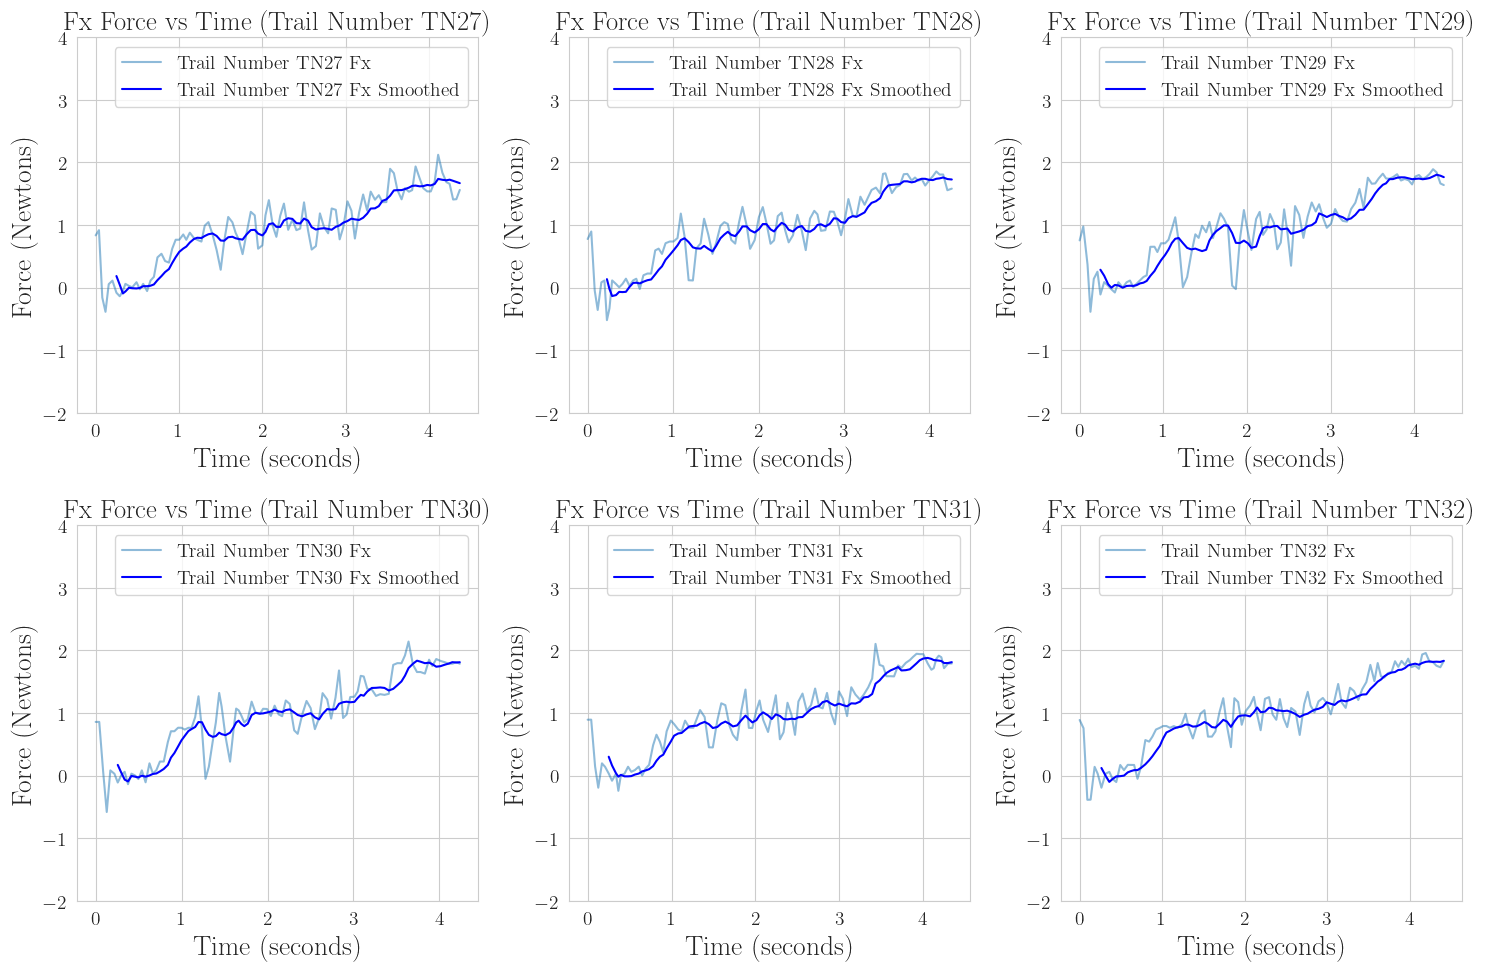

In [75]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Path to the CSV file
file_path = "/home/debojit/Output_Generalization/trajectory_data/all_trials_data.csv"

# Read the CSV file into a DataFrame
df = pd.read_csv(file_path)

# Initialize an empty list to store modified time values
modified_time = []

# Iterate through each trial
for trial in df['Trial'].unique():
    # Get the data for the current trial
    trial_data = df[df['Trial'] == trial]
    # Get the minimum time value for the current trial
    min_time = trial_data['Time'].min()
    # Subtract the minimum time value from all time values in the current trial
    modified_time.extend(trial_data['Time'] - min_time)

# Add the modified time values as a new column to the DataFrame
df['Modified_Time'] = modified_time

# Filter the DataFrame for trials 27 to 32
trials_data = df[df['Trial'].isin([f'TN{i}' for i in range(27, 33)])]

# Create a 2x3 grid of subplots
fig, axs = plt.subplots(2, 3, figsize=(15, 10))

# Iterate through each trial and plot only 'Fx' forces against modified time
for i, trial in enumerate(trials_data['Trial'].unique()):
    trial_data = trials_data[trials_data['Trial'] == trial]
    row = i // 3
    col = i % 3
    axs[row, col].plot(trial_data['Modified_Time'], trial_data['Fx'], label=f'Trail Number {trial} Fx', alpha=0.5)
    
    # Smoothed plots using a moving average (window size = 7)
    axs[row, col].plot(trial_data['Modified_Time'], trial_data['Fx'].rolling(window=7).mean(), label=f'Trail Number {trial} Fx Smoothed', color='blue')
    
    axs[row, col].set_xlabel('Time (seconds)')
    axs[row, col].set_ylabel('Force (Newtons)')
    axs[row, col].set_title(f'Fx Force vs Time (Trail Number {trial})')
    axs[row, col].legend()
    axs[row, col].grid(True)
    axs[row, col].set_ylim(-2, 4)  # Set y-axis limits for consistency

plt.tight_layout()
plt.savefig("Fx_Forces_vs_Time.png")
plt.show()


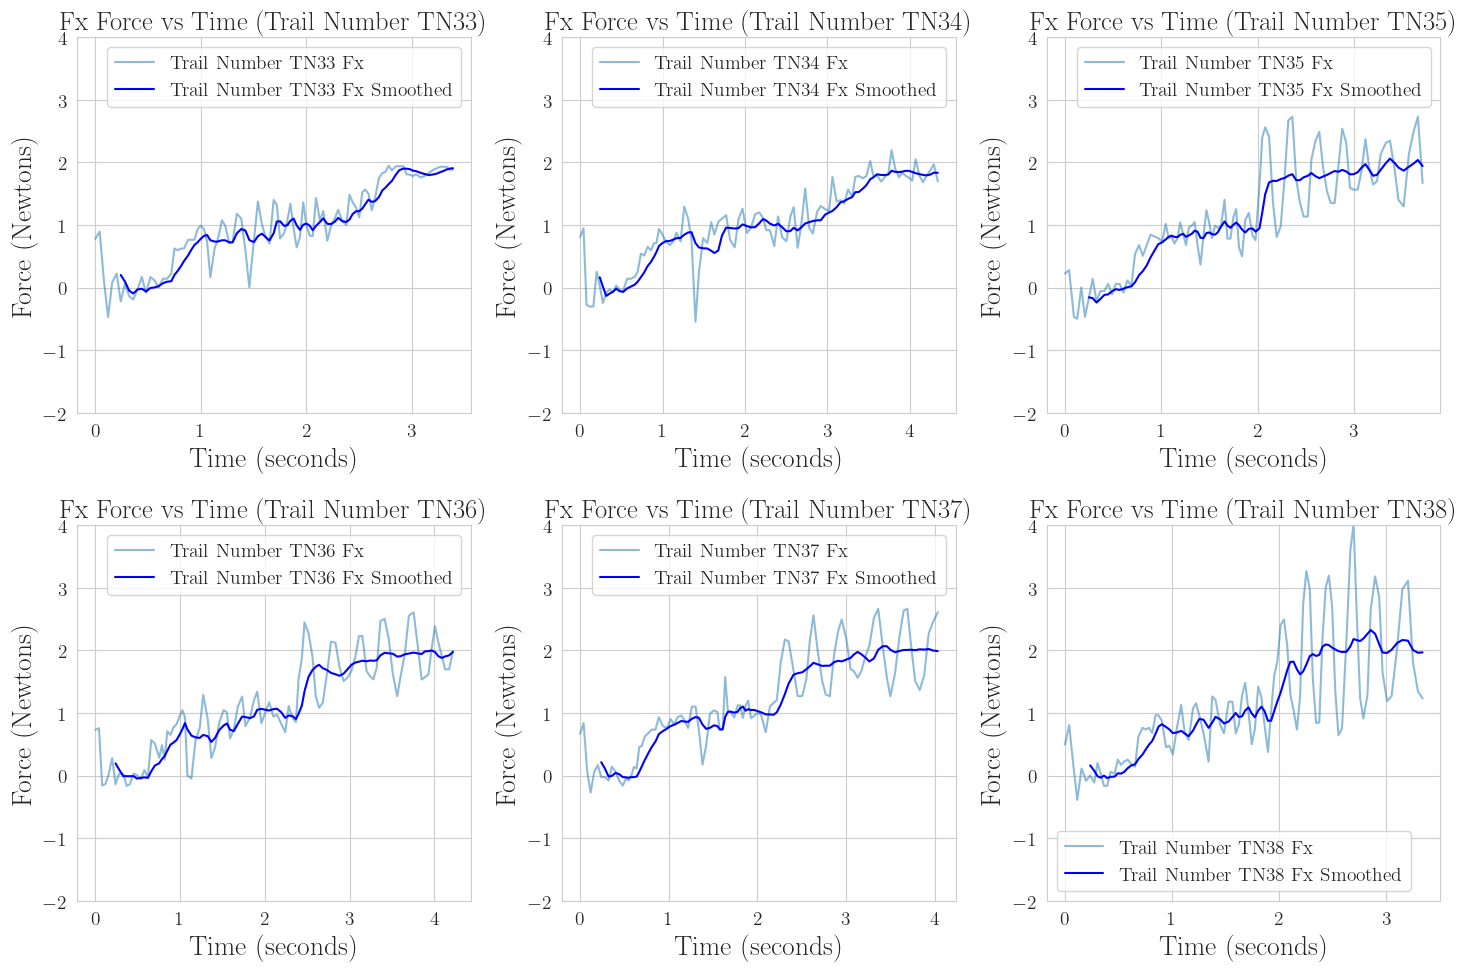

In [76]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Path to the CSV file
file_path = "/home/debojit/Output_Generalization/trajectory_data/all_trials_data.csv"

# Read the CSV file into a DataFrame
df = pd.read_csv(file_path)

# Initialize an empty list to store modified time values
modified_time = []

# Iterate through each trial
for trial in df['Trial'].unique():
    # Get the data for the current trial
    trial_data = df[df['Trial'] == trial]
    # Get the minimum time value for the current trial
    min_time = trial_data['Time'].min()
    # Subtract the minimum time value from all time values in the current trial
    modified_time.extend(trial_data['Time'] - min_time)

# Add the modified time values as a new column to the DataFrame
df['Modified_Time'] = modified_time

# Filter the DataFrame for trials 27 to 32
trials_data = df[df['Trial'].isin([f'TN{i}' for i in range(33, 39)])]

# Create a 2x3 grid of subplots
fig, axs = plt.subplots(2, 3, figsize=(15, 10))

# Iterate through each trial and plot only 'Fx' forces against modified time
for i, trial in enumerate(trials_data['Trial'].unique()):
    trial_data = trials_data[trials_data['Trial'] == trial]
    row = i // 3
    col = i % 3
    axs[row, col].plot(trial_data['Modified_Time'], trial_data['Fx'], label=f'Trail Number {trial} Fx', alpha=0.5)
    
    # Smoothed plots using a moving average (window size = 7)
    axs[row, col].plot(trial_data['Modified_Time'], trial_data['Fx'].rolling(window=7).mean(), label=f'Trail Number {trial} Fx Smoothed', color='blue')
    
    axs[row, col].set_xlabel('Time (seconds)')
    axs[row, col].set_ylabel('Force (Newtons)')
    axs[row, col].set_title(f'Fx Force vs Time (Trail Number {trial})')
    axs[row, col].legend()
    axs[row, col].grid(True)
    axs[row, col].set_ylim(-2, 4)  # Set y-axis limits for consistency

plt.tight_layout()
plt.savefig("Fx_Forces_vs_Time.png")
plt.show()


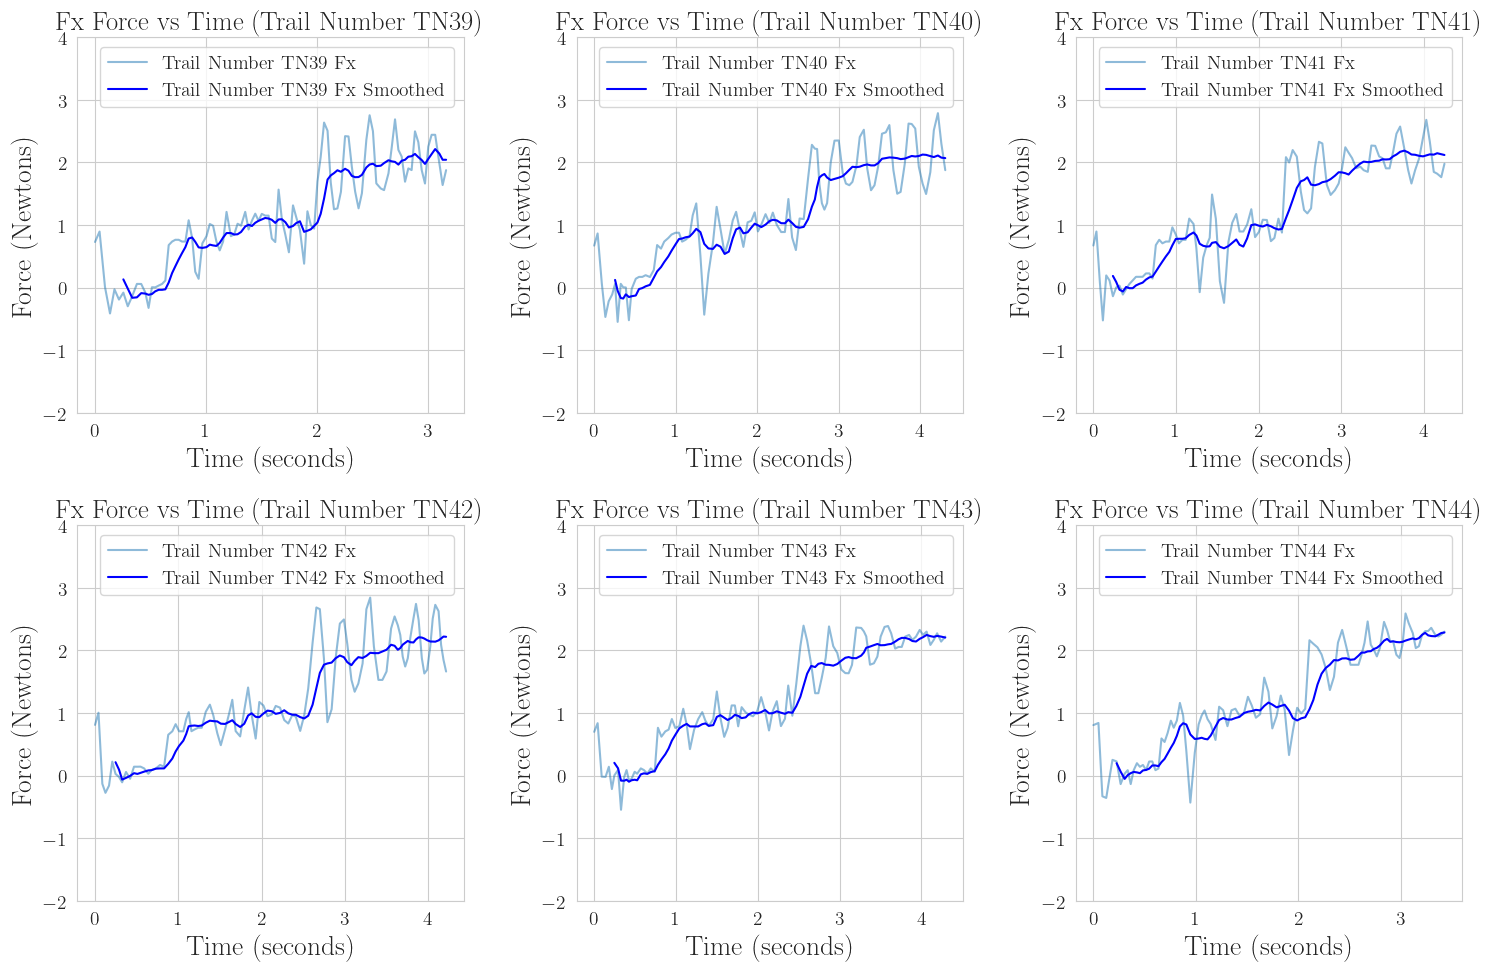

In [77]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Path to the CSV file
file_path = "/home/debojit/Output_Generalization/trajectory_data/all_trials_data.csv"

# Read the CSV file into a DataFrame
df = pd.read_csv(file_path)

# Initialize an empty list to store modified time values
modified_time = []

# Iterate through each trial
for trial in df['Trial'].unique():
    # Get the data for the current trial
    trial_data = df[df['Trial'] == trial]
    # Get the minimum time value for the current trial
    min_time = trial_data['Time'].min()
    # Subtract the minimum time value from all time values in the current trial
    modified_time.extend(trial_data['Time'] - min_time)

# Add the modified time values as a new column to the DataFrame
df['Modified_Time'] = modified_time

# Filter the DataFrame for trials 27 to 32
trials_data = df[df['Trial'].isin([f'TN{i}' for i in range(39, 45)])]

# Create a 2x3 grid of subplots
fig, axs = plt.subplots(2, 3, figsize=(15, 10))

# Iterate through each trial and plot only 'Fx' forces against modified time
for i, trial in enumerate(trials_data['Trial'].unique()):
    trial_data = trials_data[trials_data['Trial'] == trial]
    row = i // 3
    col = i % 3
    axs[row, col].plot(trial_data['Modified_Time'], trial_data['Fx'], label=f'Trail Number {trial} Fx', alpha=0.5)
    
    # Smoothed plots using a moving average (window size = 7)
    axs[row, col].plot(trial_data['Modified_Time'], trial_data['Fx'].rolling(window=7).mean(), label=f'Trail Number {trial} Fx Smoothed', color='blue')
    
    axs[row, col].set_xlabel('Time (seconds)')
    axs[row, col].set_ylabel('Force (Newtons)')
    axs[row, col].set_title(f'Fx Force vs Time (Trail Number {trial})')
    axs[row, col].legend()
    axs[row, col].grid(True)
    axs[row, col].set_ylim(-2, 4)  # Set y-axis limits for consistency

plt.tight_layout()
plt.savefig("Fx_Forces_vs_Time.png")
plt.show()


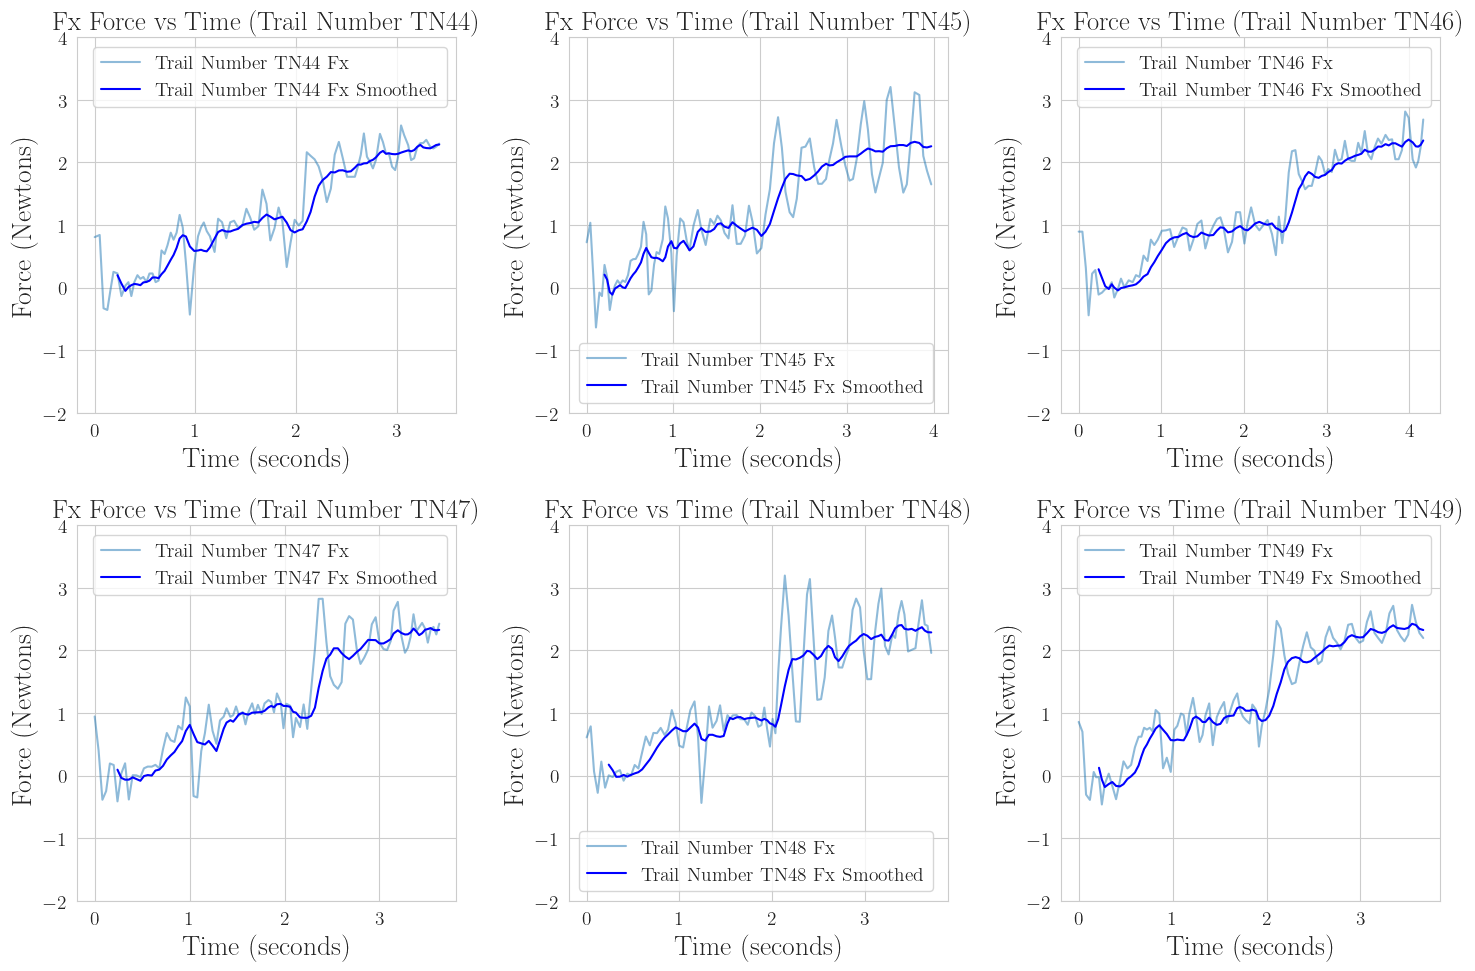

In [78]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Path to the CSV file
file_path = "/home/debojit/Output_Generalization/trajectory_data/all_trials_data.csv"

# Read the CSV file into a DataFrame
df = pd.read_csv(file_path)

# Initialize an empty list to store modified time values
modified_time = []

# Iterate through each trial
for trial in df['Trial'].unique():
    # Get the data for the current trial
    trial_data = df[df['Trial'] == trial]
    # Get the minimum time value for the current trial
    min_time = trial_data['Time'].min()
    # Subtract the minimum time value from all time values in the current trial
    modified_time.extend(trial_data['Time'] - min_time)

# Add the modified time values as a new column to the DataFrame
df['Modified_Time'] = modified_time

# Filter the DataFrame for trials 27 to 32
trials_data = df[df['Trial'].isin([f'TN{i}' for i in range(44, 50)])]

# Create a 2x3 grid of subplots
fig, axs = plt.subplots(2, 3, figsize=(15, 10))

# Iterate through each trial and plot only 'Fx' forces against modified time
for i, trial in enumerate(trials_data['Trial'].unique()):
    trial_data = trials_data[trials_data['Trial'] == trial]
    row = i // 3
    col = i % 3
    axs[row, col].plot(trial_data['Modified_Time'], trial_data['Fx'], label=f'Trail Number {trial} Fx', alpha=0.5)
    
    # Smoothed plots using a moving average (window size = 7)
    axs[row, col].plot(trial_data['Modified_Time'], trial_data['Fx'].rolling(window=7).mean(), label=f'Trail Number {trial} Fx Smoothed', color='blue')
    
    axs[row, col].set_xlabel('Time (seconds)')
    axs[row, col].set_ylabel('Force (Newtons)')
    axs[row, col].set_title(f'Fx Force vs Time (Trail Number {trial})')
    axs[row, col].legend()
    axs[row, col].grid(True)
    axs[row, col].set_ylim(-2, 4)  # Set y-axis limits for consistency

plt.tight_layout()
plt.savefig("Fx_Forces_vs_Time.png")
plt.show()


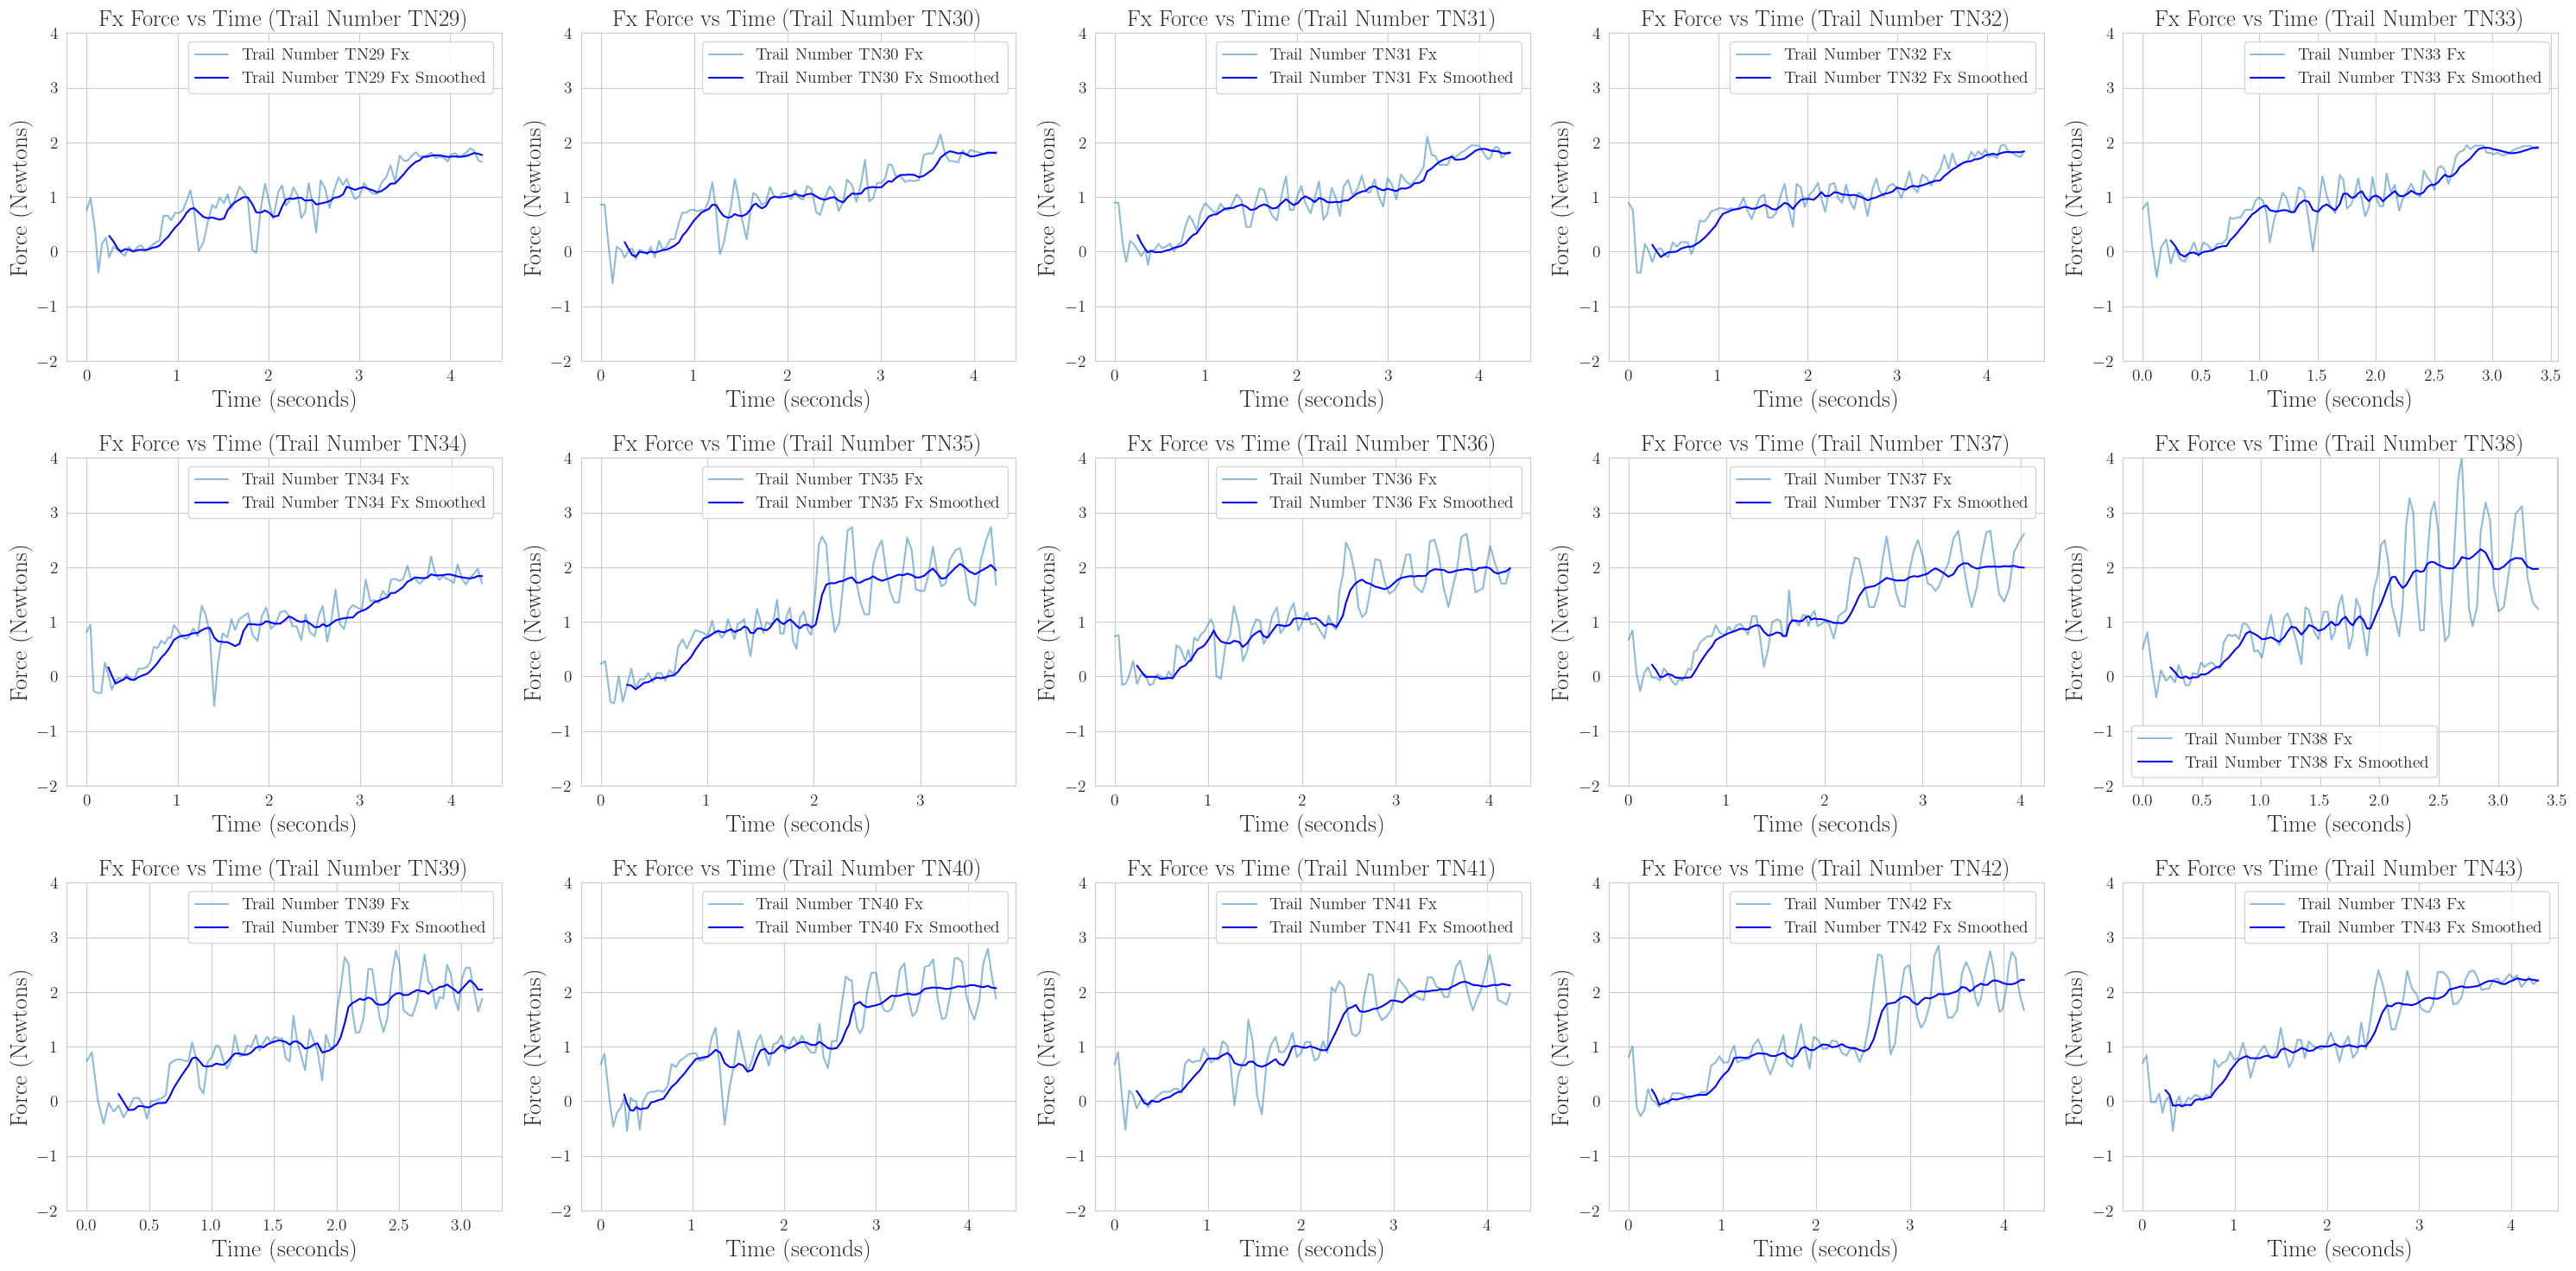

In [79]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Path to the CSV file
file_path = "/home/debojit/Output_Generalization/trajectory_data/all_trials_data.csv"

# Read the CSV file into a DataFrame
df = pd.read_csv(file_path)

# Initialize an empty list to store modified time values
modified_time = []

# Iterate through each trial
for trial in df['Trial'].unique():
    # Get the data for the current trial
    trial_data = df[df['Trial'] == trial]
    # Get the minimum time value for the current trial
    min_time = trial_data['Time'].min()
    # Subtract the minimum time value from all time values in the current trial
    modified_time.extend(trial_data['Time'] - min_time)

# Add the modified time values as a new column to the DataFrame
df['Modified_Time'] = modified_time

# Filter the DataFrame for trials 19 to 49
trials_data = df[df['Trial'].isin([f'TN{i}' for i in range(29, 44)])]

# Create a 3x10 grid of subplots
fig, axs = plt.subplots(3, 5, figsize=(30, 15))  # Adjusted the size for better visibility

# Flatten the axes array for easier iteration
axs = axs.flatten()

# Iterate through each trial and plot only 'Fx' forces against modified time
for i, trial in enumerate(sorted(trials_data['Trial'].unique())):
    if i < 15:  # Ensure we don't exceed the 30 subplots
        trial_data = trials_data[trials_data['Trial'] == trial]
        axs[i].plot(trial_data['Modified_Time'], trial_data['Fx'], label=f'Trail Number {trial} Fx', alpha=0.5)

        # Smoothed plots using a moving average (window size = 7)
        axs[i].plot(trial_data['Modified_Time'], trial_data['Fx'].rolling(window=7).mean(), label=f'Trail Number {trial} Fx Smoothed', color='blue')

        axs[i].set_xlabel('Time (seconds)')
        axs[i].set_ylabel('Force (Newtons)')
        axs[i].set_title(f'Fx Force vs Time (Trail Number {trial})')
        axs[i].legend()
        axs[i].grid(True)
        axs[i].set_ylim(-2, 4)  # Set y-axis limits for consistency

# Adjust layout to prevent overlap
plt.tight_layout()
plt.savefig("Fx_Forces_vs_Time.png")
plt.show()


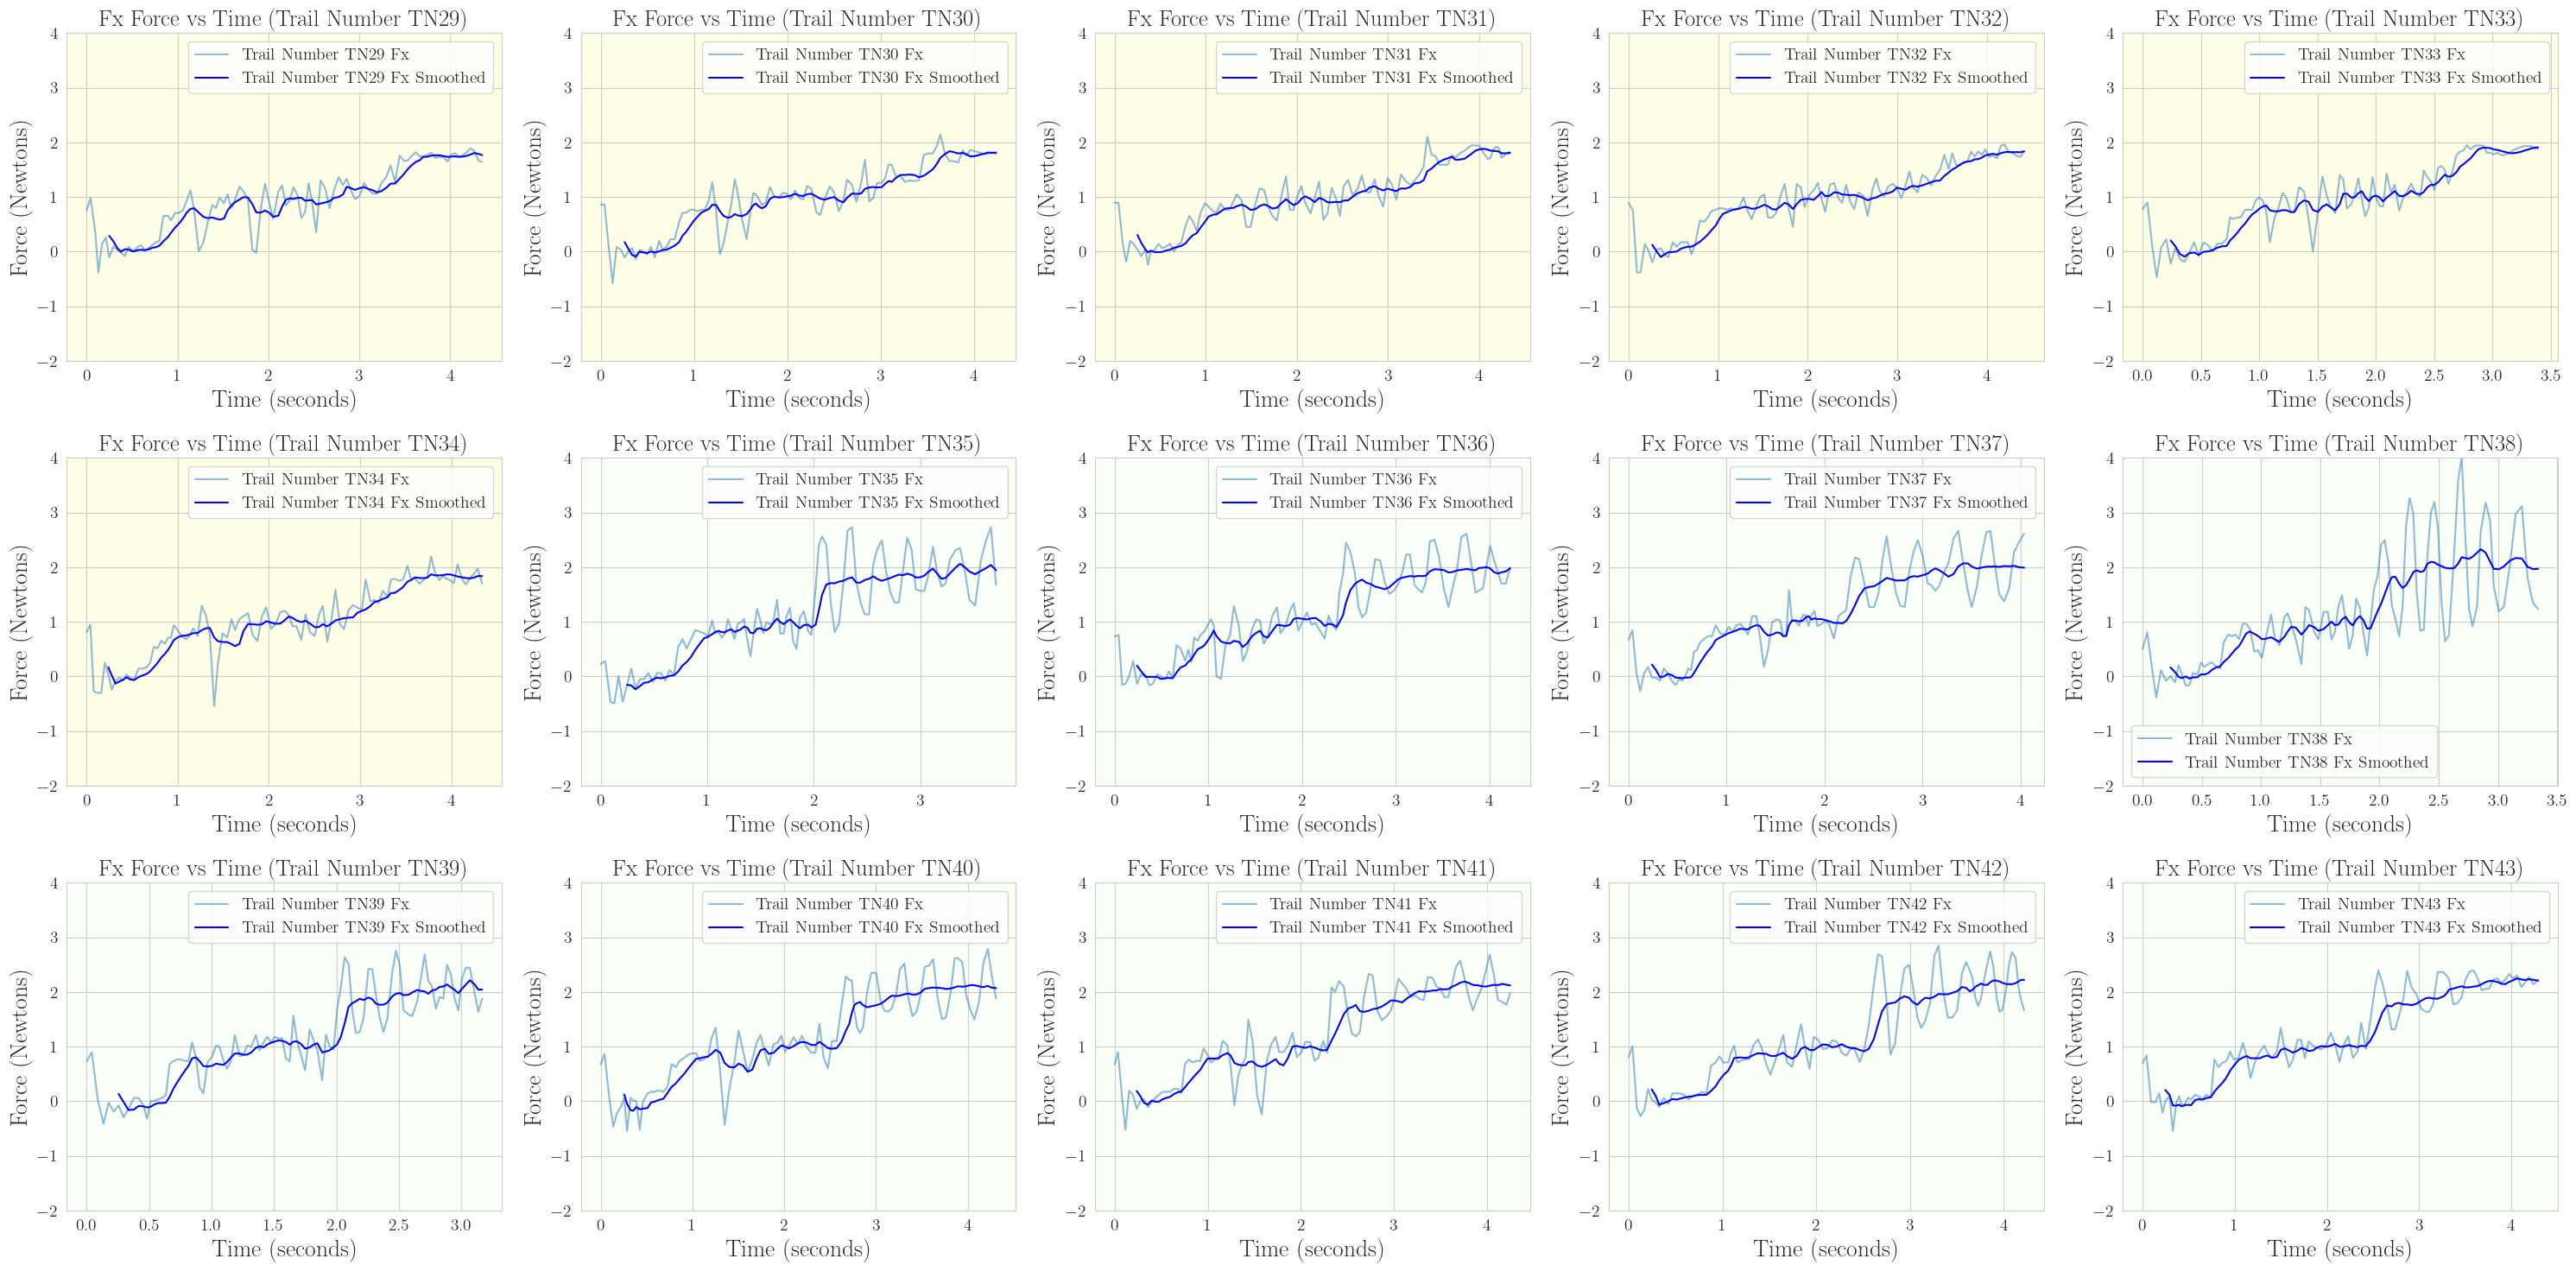

In [80]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Path to the CSV file
file_path = "/home/debojit/Output_Generalization/trajectory_data/all_trials_data.csv"

# Read the CSV file into a DataFrame
df = pd.read_csv(file_path)

# Initialize an empty list to store modified time values
modified_time = []

# Iterate through each trial
for trial in df['Trial'].unique():
    # Get the data for the current trial
    trial_data = df[df['Trial'] == trial]
    # Get the minimum time value for the current trial
    min_time = trial_data['Time'].min()
    # Subtract the minimum time value from all time values in the current trial
    modified_time.extend(trial_data['Time'] - min_time)

# Add the modified time values as a new column to the DataFrame
df['Modified_Time'] = modified_time

# Filter the DataFrame for trials 29 to 44
trials_data = df[df['Trial'].isin([f'TN{i}' for i in range(29, 45)])]

# Create a 3x5 grid of subplots
fig, axs = plt.subplots(3, 5, figsize=(30, 15))  # Adjusted the size for better visibility

# Flatten the axes array for easier iteration
axs = axs.flatten()

# Define very light pastel colors
very_light_pastel_yellow = '#FFFFE8'  # Very light pastel yellow
very_light_pastel_green = '#fafff8'  # Very light pastel green

# Iterate through each trial and plot only 'Fx' forces against modified time
for i, trial in enumerate(sorted(trials_data['Trial'].unique())):
    trial_data = trials_data[trials_data['Trial'] == trial]
    if i < 15:  # Ensure we don't exceed the number of subplots
        axs[i].plot(trial_data['Modified_Time'], trial_data['Fx'], label=f'Trail Number {trial} Fx', alpha=0.5)
        # Smoothed plots using a moving average (window size = 7)
        axs[i].plot(trial_data['Modified_Time'], trial_data['Fx'].rolling(window=7).mean(), label=f'Trail Number {trial} Fx Smoothed', color='blue')

        # Set axis labels and titles
        axs[i].set_xlabel('Time (seconds)')
        axs[i].set_ylabel('Force (Newtons)')
        axs[i].set_title(f'Fx Force vs Time (Trail Number {trial})')
        axs[i].legend()
        axs[i].grid(True)
        axs[i].set_ylim(-2, 4)  # Set y-axis limits for consistency

        # Set background color based on trial number
        trial_number = int(trial[2:])  # Extract the number part of the trial string
        if trial_number <= 34:
            axs[i].set_facecolor(very_light_pastel_yellow)
        else:
            axs[i].set_facecolor(very_light_pastel_green)

# Adjust layout to prevent overlap
plt.tight_layout()
plt.savefig("Fx_Forces_vs_Time.png")
plt.show()


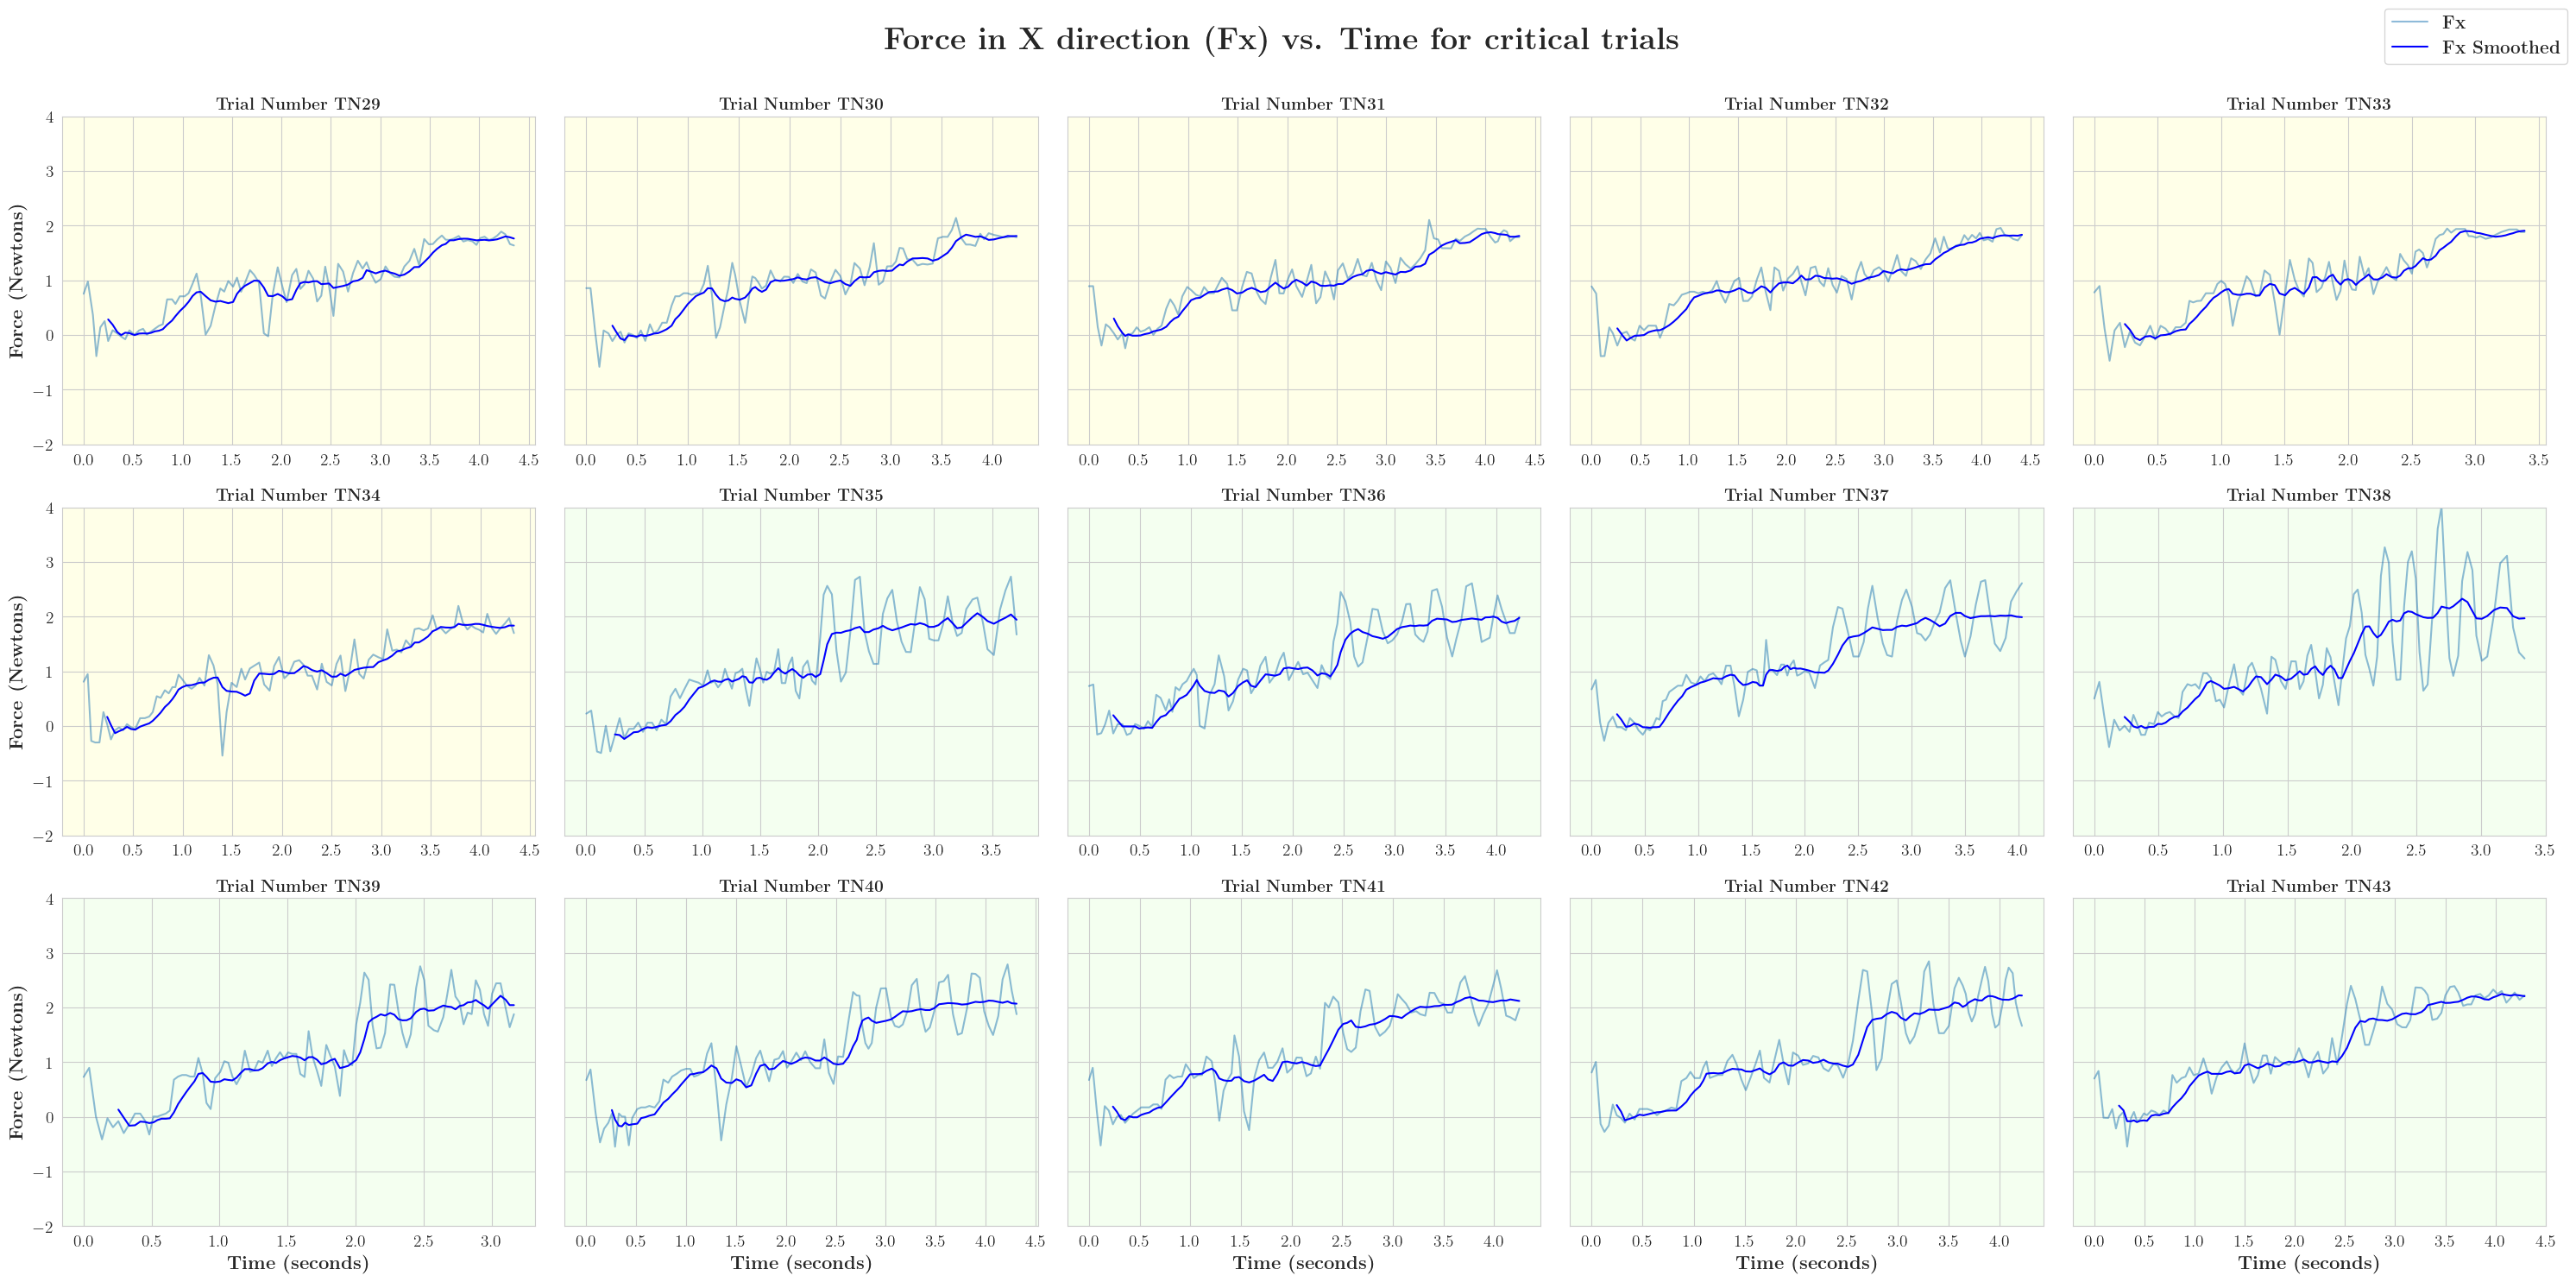

In [81]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator

# Enable LaTeX font rendering in matplotlib with bold text globally
plt.rcParams.update({
    "text.usetex": True,               # Use LaTeX for text
    "font.family": "serif",            # Use serif fonts (matches LaTeX)
    "font.serif": ["Computer Modern"], # Set font to Computer Modern, the default LaTeX font
    "axes.labelsize": 20,              # Set font sizes for axis labels
    "font.size": 16,                   # Set default font size
    "legend.fontsize": 14,
    "xtick.labelsize": 14,
    "ytick.labelsize": 14
})

# Re-importing the necessary CSV file
file_path = "/home/debojit/Output_Generalization/trajectory_data/all_trials_data.csv"
df = pd.read_csv(file_path)

# Initialize an empty list to store modified time values
modified_time = []

# Iterate through each trial
for trial in df['Trial'].unique():
    # Get the data for the current trial
    trial_data = df[df['Trial'] == trial]
    # Get the minimum time value for the current trial
    min_time = trial_data['Time'].min()
    # Subtract the minimum time value from all time values in the current trial
    modified_time.extend(trial_data['Time'] - min_time)

# Add the modified time values as a new column to the DataFrame
df['Modified_Time'] = modified_time

# Filter the DataFrame for trials 29 to 44
trials_data = df[df['Trial'].isin([f'TN{i}' for i in range(29, 45)])]

# Now re-run the plotting code
fig, axs = plt.subplots(3, 5, figsize=(30, 15))  # Adjusted the size for better visibility

# Flatten the axes array for easier iteration
axs = axs.flatten()

# Define very light pastel colors
very_light_pastel_yellow = '#FFFFE8'  # Very light pastel yellow
very_light_pastel_green = '#f4fff0'  # Very light pastel green

# Iterate through each trial and plot only 'Fx' forces against modified time
for i, trial in enumerate(sorted(trials_data['Trial'].unique())):
    trial_data = trials_data[trials_data['Trial'] == trial]
    if i < 15:  # Ensure we don't exceed the number of subplots
        axs[i].plot(trial_data['Modified_Time'], trial_data['Fx'], label=r'\textbf{Fx}', alpha=0.5)
        # Smoothed plots using a moving average (window size = 7)
        axs[i].plot(trial_data['Modified_Time'], trial_data['Fx'].rolling(window=7).mean(), label=r'\textbf{Fx Smoothed}', color='blue')

        # Set titles for each subplot with LaTeX bold
        axs[i].set_title(r'\textbf{Trial Number ' + trial + '}', fontsize=14)  # Use LaTeX bold in title
        axs[i].grid(True)
        axs[i].set_ylim(-2, 4)  # Set y-axis limits for consistency

        # Set x-grid spacing to 0.5
        axs[i].xaxis.set_major_locator(MultipleLocator(0.5))

        trial_number = int(trial[2:])  # Extract the number part of the trial string
        # Set individual x-axis labels for all plots
        if trial_number > 38:
            axs[i].set_xlabel(r'\textbf{Time (seconds)}', fontsize=16)  # Use LaTeX bold in x-axis label

        # Only set y-axis labels for the first column
        if i % 5 == 0:
            axs[i].set_ylabel(r'\textbf{Force (Newtons)}', fontsize=16)  # Use LaTeX bold in y-axis label
        else:
            axs[i].set_yticklabels([])

        # Set background color based on trial number
        if trial_number <= 34:
            axs[i].set_facecolor(very_light_pastel_yellow)
        else:
            axs[i].set_facecolor(very_light_pastel_green)

# Add a common title for the entire figure with LaTeX bold
fig.suptitle(r'\textbf{Force in X direction (Fx) vs. Time for critical trials}', fontsize=26)  # Updated title with LaTeX bold


# Create a common legend for the entire figure with LaTeX bold labels
handles, labels = axs[0].get_legend_handles_labels()
fig.legend(handles, [r'\textbf{Fx}', r'\textbf{Fx Smoothed}'], loc='upper right', fontsize=15)

# Adjust layout to prevent overlap
plt.tight_layout(rect=[0, 0, 1, 0.98])  # Leave space for the main title and legend
plt.savefig("Fx_Forces_vs_Time_updated.png")
plt.show()
